# Sales Dataset - Data Visualization

In this project, I analyze a sales dataset that contains information about orders, products, customers, and regions.
The goal is to explore the data and visualize key trends in sales and profits.

## Downloading and Reviewing data
I start by loading the dataset and checking:
- The first rows of the table
- Dataset size
- Missing values
- Duplicates
- Data types of all columns

This helps me understand the structure and quality of the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("C:\\Users\\lb_20\\Downloads\\Sales Dataset.csv")

In [4]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [5]:
df.shape

(1194, 12)

In [6]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


## Brief Statistical Summary
I use basic statistics to understand the main numerical columns:
- Amount
- Profit
- Quantity

This shows average values, minimums, maximums, and spread of the data.Z

In [10]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


## Unique Values

Here I check how many unique values each column has.

This helps to understand:
- How many categories exist
- How many customers and orders there are
- How varied the data is

In [12]:
df.nunique(dropna=True)

Order ID        547
Amount          773
Profit          707
Quantity         20
Category          3
Sub-Category     12
PaymentMode       5
Order Date      648
CustomerName    802
State             6
City             18
Year-Month       61
dtype: int64

## Data Preparation

I convert the order date to a datetime format.  
This allows easier analysis by time (monthly trends, grouping).

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [15]:
display(df.dtypes)

Order ID                object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Year-Month              object
dtype: object

## Global metrics

I calculate:
- Total sales amount
- Total profit
- Number of unique orders
- Number of unique customers

These values give a quick overview of the whole dataset.

In [17]:
all_sales = df["Amount"].sum()
all_profits = df["Profit"].sum()
all_orders = df["Order ID"].nunique()
all_customers = df["CustomerName"].nunique()

print(f"Total Sales: {all_sales}", 
      f"Total Profit: {all_profits}", 
      f"Total Orders: {all_orders}",
      f"The number of unique customers: {all_customers}", sep = "\n")

Total Sales: 6182639
Total Profit: 1610697
Total Orders: 547
The number of unique customers: 802


## Sales by Category

This chart shows how many orders belong to each product category.

It helps to see which category is the most popular.

In [19]:
category_counts = df["Category"].value_counts()
category_counts

Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64

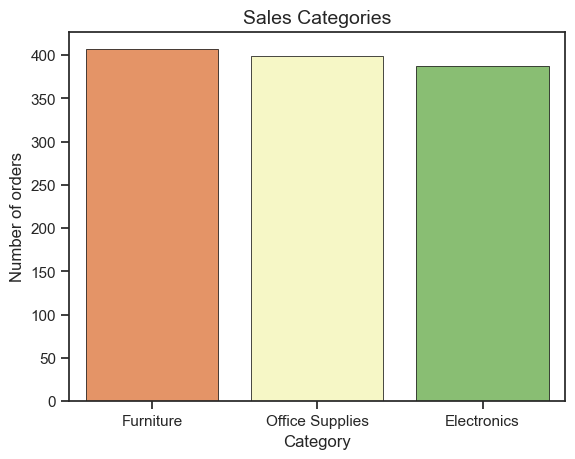

In [20]:
sns.set_theme(style = "ticks")

sns.barplot(x = category_counts.index, y = category_counts.values, 
            palette = "RdYlGn", 
            edgecolor = "black", 
            linewidth = 0.5)
plt.title("Sales Categories", fontsize = 14)
plt.xlabel("Category")
plt.ylabel("Number of orders")
plt.show()

## Sales by Sub-Category

This visualization shows the number of orders for each sub-category.

It provides more detailed insight inside each main category.

In [22]:
sub_category_counts = df["Sub-Category"].value_counts()
sub_category_counts

Sub-Category
Tables              122
Pens                114
Sofas               114
Markers             110
Electronic Games    104
Paper               104
Phones              101
Printers             95
Laptops              88
Bookcases            88
Chairs               83
Binders              71
Name: count, dtype: int64

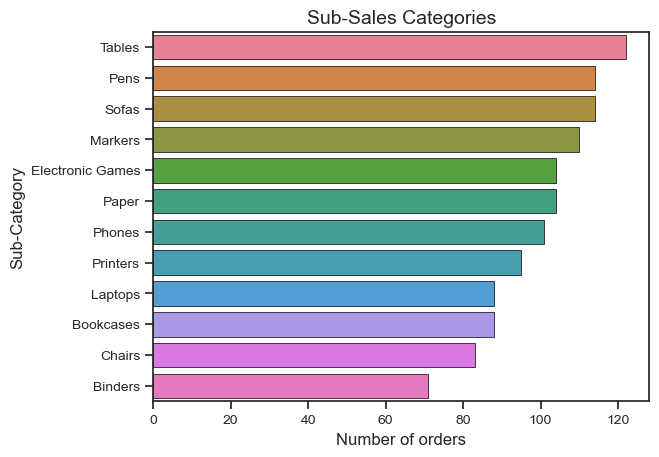

In [23]:
sns.set_theme(style = "ticks")

sns.barplot(x = sub_category_counts.values, y = sub_category_counts.index, 
            palette = "husl", 
            edgecolor = "black", 
            linewidth = 0.5)
plt.title("Sub-Sales Categories", fontsize = 14)
plt.xlabel("Number of orders", fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel("Sub-Category", fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

## Orders by State

This chart shows how many orders come from each state.

It helps identify the most active regions.

In [25]:
state_counts = df["State"].value_counts()
state_counts

State
New York      226
California    218
Florida       200
Texas         189
Illinois      181
Ohio          180
Name: count, dtype: int64

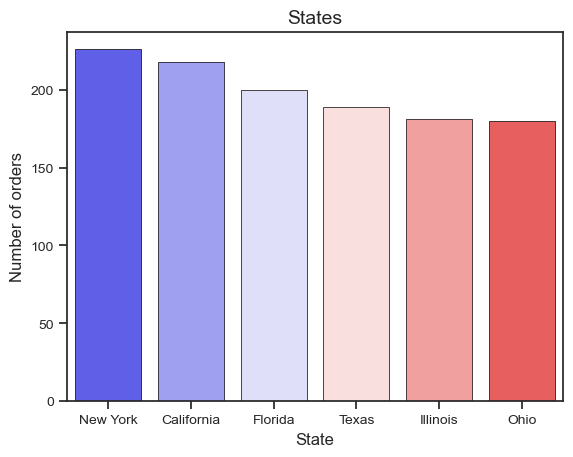

In [26]:
sns.set_theme(style = "ticks")

sns.barplot(x = state_counts.index, y = state_counts.values, 
            palette = "bwr", 
            edgecolor = "black", 
            linewidth = 0.5)
plt.title("States", fontsize = 14)
plt.xlabel("State", fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel("Number of orders", fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

## Orders by City

This chart displays the number of orders for each city.

It highlights the most active cities in the dataset.

In [28]:
city_counts = df["City"].value_counts()
city_counts

City
Buffalo          90
San Francisco    84
Orlando          77
Rochester        74
San Diego        73
Dallas           72
Cleveland        70
Springfield      68
Miami            66
Austin           65
Chicago          63
New York City    62
Cincinnati       61
Los Angeles      61
Tampa            57
Houston          52
Peoria           50
Columbus         49
Name: count, dtype: int64

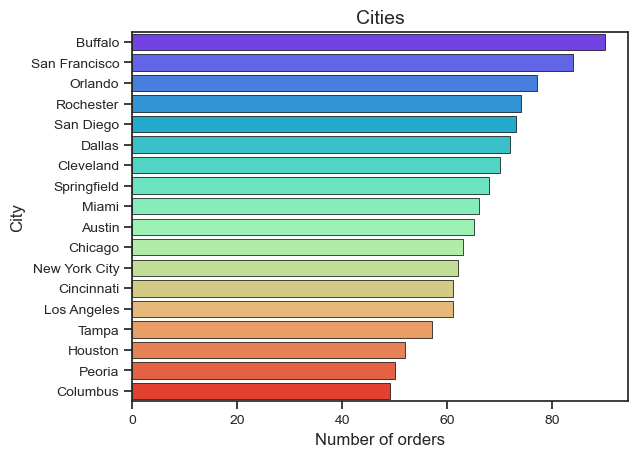

In [29]:
sns.set_theme(style = "ticks")

sns.barplot(x = city_counts.values, y = city_counts.index, 
            palette = "rainbow", 
            edgecolor = "black", 
            linewidth = 0.5)
plt.title("Cities", fontsize = 14)
plt.xlabel("Number of orders", fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel("City", fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

## Categories by Payment Mode

This plot shows how different payment methods are used across product categories.

It helps understand customer payment behavior.

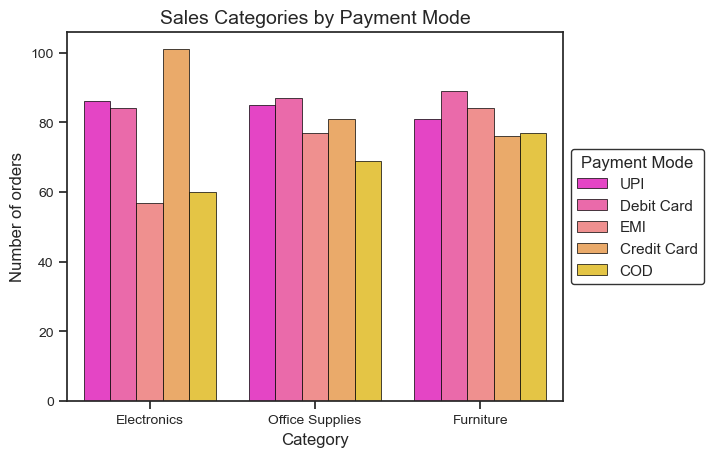

In [31]:
sns.set_theme(style = "ticks")

sns.countplot(x = df['Category'], hue = df['PaymentMode'],
              palette = "spring", 
              edgecolor = "black", 
              linewidth = 0.5)
plt.title("Sales Categories by Payment Mode", fontsize = 14)
plt.xlabel("Category", fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel("Number of orders", fontsize = 12)
plt.yticks(fontsize = 10)
plt.legend(title = "Payment Mode",
           loc = "center left",
           bbox_to_anchor = (1, 0.5),
           edgecolor = "black")
plt.show()

## Payment Mode Distribution

This pie chart shows the share of each payment method.

It gives a quick visual overview of how customers pay for orders.

In [33]:
payment_mode = df['PaymentMode'].value_counts()
payment_mode

PaymentMode
Debit Card     260
Credit Card    258
UPI            252
EMI            218
COD            206
Name: count, dtype: int64

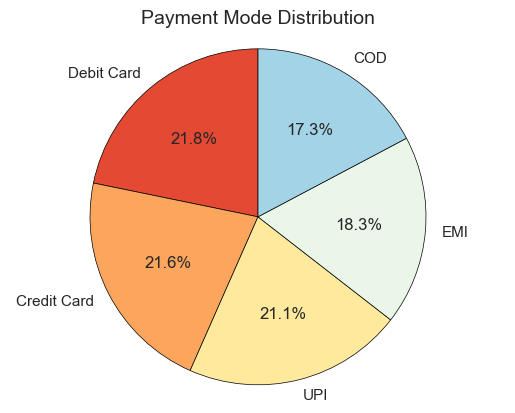

In [34]:
sns.set_theme(style = "ticks")

plt.pie(payment_mode.values, labels = payment_mode.index, 
        colors = sns.color_palette("RdYlBu"), 
        autopct = "%1.1f%%", 
        startangle = 90,
        wedgeprops = {"edgecolor": "black",
                      "linewidth": 0.5})
plt.title("Payment Mode Distribution", fontsize = 14)
plt.axis("equal")
plt.show()

## Total Amount vs Profit by Category

Here I compare total sales amount and total profit for each category.

This helps to see which categories are the most profitable.

In [36]:
am_prof_cat = df.groupby('Category')[['Amount', 'Profit']].sum()
am_prof_cat

,Amount,Profit
Category,,
Electronics,2054456,518580
Furniture,2038673,540542
Office Supplies,2089510,551575


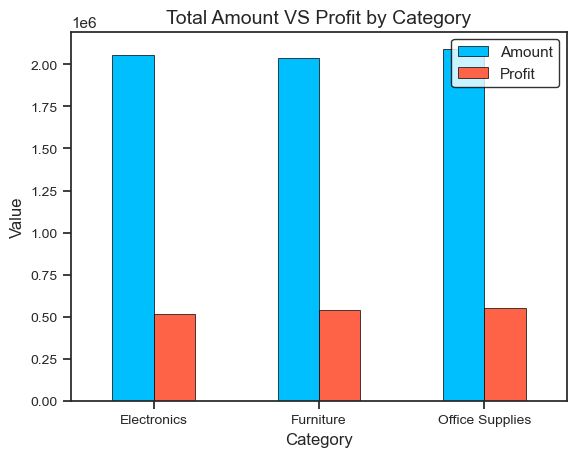

In [37]:
sns.set_theme(style = "ticks")

res = am_prof_cat.plot(kind = "bar",
                       color = ["#00BFFF", "#FF6347"],
                       edgecolor = "black", 
                       linewidth = 0.5)
res.set_title("Total Amount VS Profit by Category", fontsize = 14)
res.set_xlabel("Category", fontsize = 12)
plt.xticks(fontsize = 10, rotation = 0)
res.set_ylabel("Value", fontsize = 12)
plt.yticks(fontsize = 10)
plt.legend(loc = "upper right",
           edgecolor = "black")
plt.show()

## Total Amount vs Profit by Sub-Category

This chart shows total amount and profit for each sub-category.

It allows more detailed comparison inside categories.

In [39]:
am_prof_subcat = df.groupby("Sub-Category")[["Amount", "Profit"]].sum()
am_prof_subcat

,Amount,Profit
Sub-Category,,
Binders,384611,97257
Bookcases,413165,118000
Chairs,431964,122892
Electronic Games,565092,148454
Laptops,419950,110260
Markers,627875,174749
Paper,524755,149723
Pens,552269,129846
Phones,503055,113607


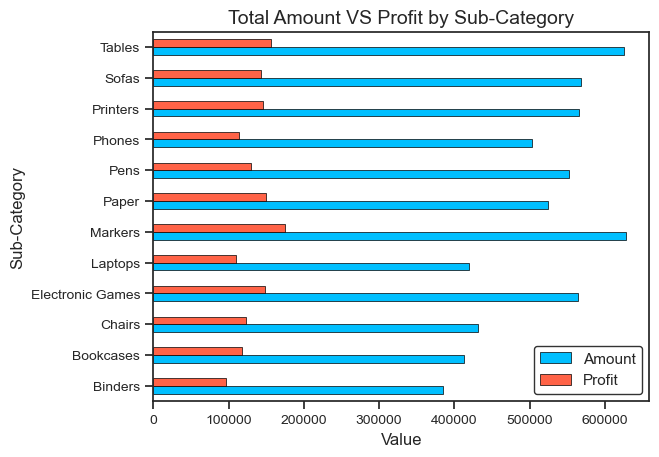

In [40]:
sns.set_theme(style = "ticks")

res = am_prof_subcat.plot(kind = "barh",
                          color = ["#00BFFF", "#FF6347"],
                          edgecolor = "black", 
                          linewidth = 0.5)
res.set_title("Total Amount VS Profit by Sub-Category", fontsize = 14)
res.set_xlabel("Value", fontsize = 12)
plt.xticks(fontsize = 10, rotation = 0)
res.set_ylabel("Sub-Category", fontsize = 12)
plt.yticks(fontsize = 10)
plt.legend(loc = "lower right",
           edgecolor = "black")
plt.show()

## Monthly Sales and Profit Trends

This line chart shows how sales amount and profit change over time.

It helps to observe trends, peaks, and possible seasonality.

In [42]:
monthly_sales_profit = df.groupby("Year-Month")[["Amount", "Profit"]].sum().reset_index()
monthly_sales_profit

,Year-Month,Amount,Profit
0,2020-03,22991,6192
1,2020-04,133385,36156
2,2020-05,113287,24294
3,2020-06,46900,9489
4,2020-07,38556,12008
...,...,...,...
56,2024-11,60976,15657
57,2024-12,98879,20981
58,2025-01,112906,38595
59,2025-02,84712,28151


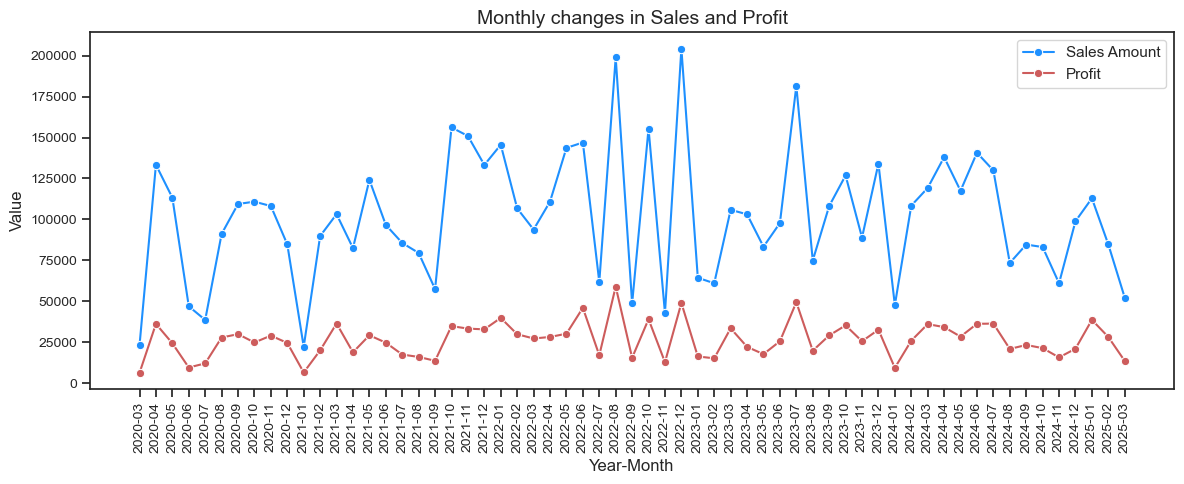

In [43]:
plt.figure(figsize=(12,5))
sns.set_theme(style = "ticks")

sns.lineplot(data = monthly_sales_profit, x = "Year-Month", y = "Amount", label = "Sales Amount", marker = "o", color = "DodgerBlue")
sns.lineplot(data = monthly_sales_profit, x = "Year-Month", y = "Profit", label = "Profit", marker = "o", color = "IndianRed")
plt.title("Monthly changes in Sales and Profit", fontsize = 14)
plt.xlabel("Year-Month", fontsize = 12)
plt.xticks(fontsize = 10, rotation = 90)
plt.ylabel("Value", fontsize = 12)
plt.yticks(fontsize = 10)
plt.legend()
plt.tight_layout()
plt.show()

## Distributions of Amount, Profit, and Quantity

These plots show how values are distributed:
- Amount
- Profit
- Quantity

They help understand the shape of the data and possible outliers.

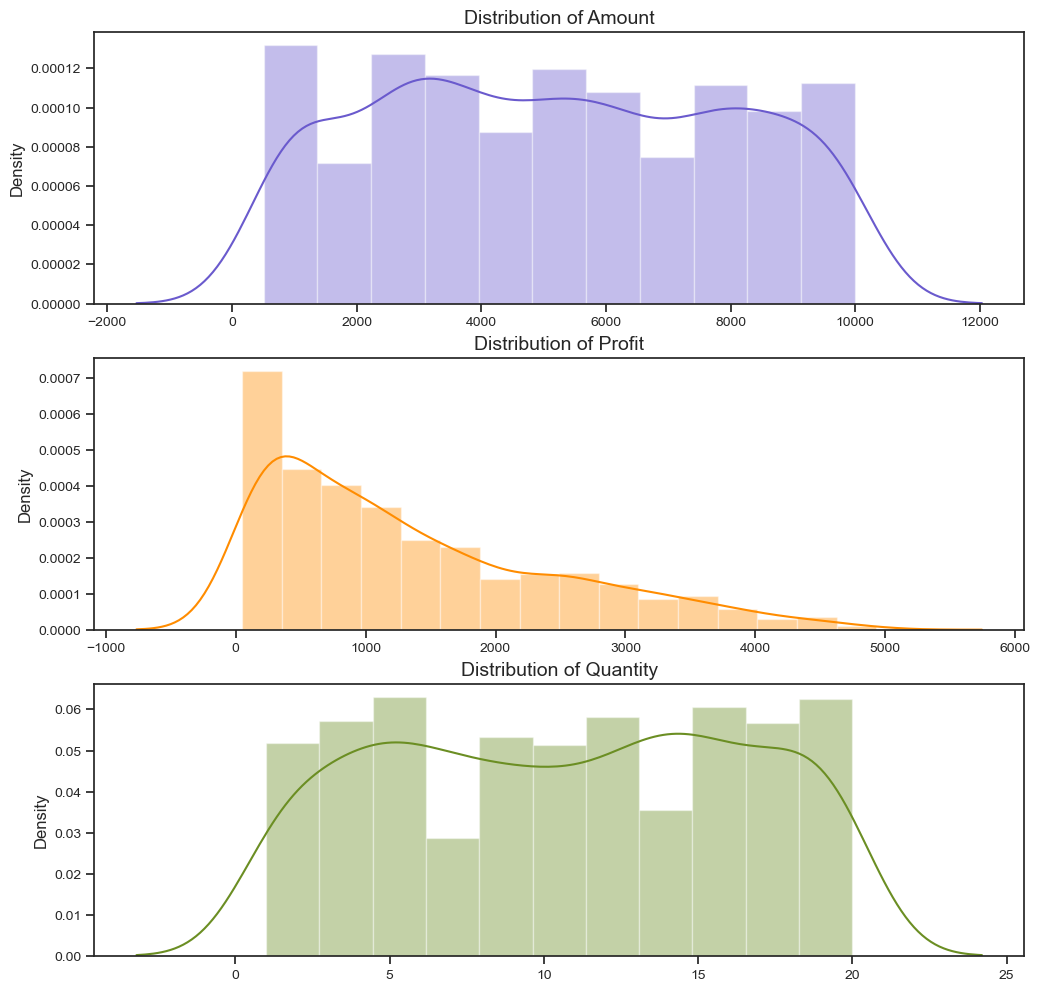

In [45]:
plt.figure(figsize=(12,12))
sns.set_theme(style = "ticks")

plt.subplot(3,1,1)
plt.title("Distribution of Amount", fontsize = 14)
plt.xticks(fontsize = 10)
plt.ylabel("Density", fontsize = 12)
plt.yticks(fontsize = 10)
sns.distplot(x = df["Amount"], color = "SlateBlue", hist = True)

plt.subplot(3,1,2)
plt.title("Distribution of Profit",fontsize = 14)
plt.xticks(fontsize = 10)
plt.ylabel("Density", fontsize = 12)
plt.yticks(fontsize = 10)
sns.distplot(x = df["Profit"], color = "DarkOrange", hist = True)

plt.subplot(3,1,3)
plt.title("Distribution of Quantity",fontsize = 14)
plt.xticks(fontsize = 10)
plt.ylabel("Density", fontsize = 12)
plt.yticks(fontsize = 10)
sns.distplot(x = df["Quantity"], color = "OliveDrab", hist = True)
plt.show()

## Sales by State and Category

This heatmap shows total sales amount for each combination of state and category.

It highlights strong and weak regions for each product group.

In [47]:
pivot_table = (df.groupby(["State", "Category"])["Amount"].sum().unstack(fill_value = 0))
pivot_table

Category,Electronics,Furniture,Office Supplies
State,,,
California,300653,416016,369767
Florida,400174,325014,365986
Illinois,285385,305640,387713
New York,371830,364633,393585
Ohio,284610,312828,287330
Texas,411804,314542,285129


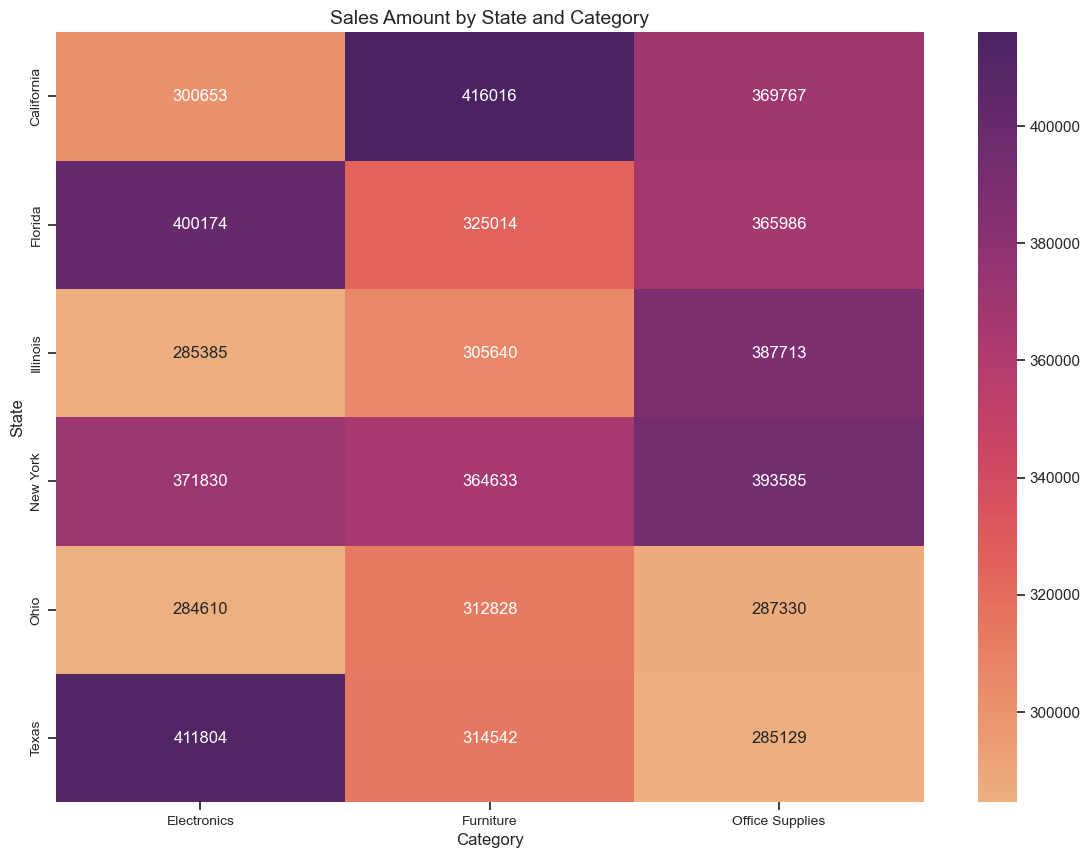

In [48]:
plt.figure(figsize = (14, 10))

sns.heatmap(pivot_table, annot = True, fmt = ".0f", cmap = "flare")
plt.title("Sales Amount by State and Category", fontsize = 14)
plt.xlabel("Category", fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel("State", fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

## Correlation Between Amount, Profit, and Quantity

This heatmap shows correlations between numerical variables.

It helps understand how strongly:
- Amount relates to Profit
- Quantity relates to financial values

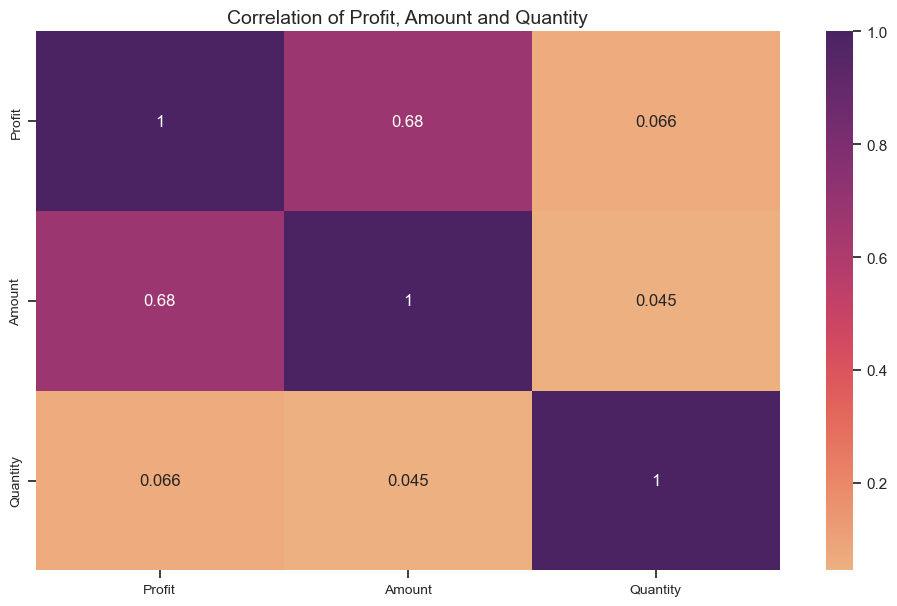

In [50]:
plt.figure(figsize=(12,7))

plt.title("Correlation of Profit, Amount and Quantity", fontsize = 14)
sns.heatmap(df[["Profit", "Amount", "Quantity"]].corr(), annot = True, cmap = "flare")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()